In [88]:
import pandas as pd
import numpy as np
import re
from os import path, getcwd
from nltk.corpus import stopwords
from PIL import Image
import wordcloud as WordCloud
from wordcloud import ImageColorGenerator
stopwords


<WordListCorpusReader in 'C:\\Users\\Shani Fisher\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [89]:
waze=pd.read_csv('Waze_reviews3.csv')

In [70]:
waze.head()

,Date,Reviews,Username,Stars,Helpful
0,31-Jul-18,this app is wonderful and i love the alerts an...,Gordon Alcindor,Rated 4 stars out of five stars,125.0
1,30-Jul-18,i like this app but i am a delivery driver in ...,Garrett Neal,Rated 3 stars out of five stars,76.0
2,1-Aug-18,waze used to work but there have been a couple...,A Google user,Rated 2 stars out of five stars,55.0
3,31-Jul-18,theres still an issue with a major part of the...,Richard Navindran,Rated 3 stars out of five stars,66.0
4,5-Aug-18,best navigation app by far the design is simpl...,Walter Krom,Rated 5 stars out of five stars,7.0


In [5]:
type(waze['Reviews'])

pandas.core.series.Series

In [6]:
waze['Reviews'][7]

"Awesome app Good accuracy and when it's not you can easily edit once you have reached a certain level of trust within the app. earn points and honk your horn at friends and others passing by! end ETA to friends your picking up or going to. I have been using this app for about 3 years now no comp...\nFull Review"

In [93]:
waze['Reviews']=list(map(lambda x : str(x) ,waze['Reviews']))
waze['Reviews'] = waze['Reviews'].apply(lambda x: re.sub('\nFull Review*', '', x))
waze['Reviews'] = waze['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
waze['Reviews'] = waze['Reviews'].apply(lambda x: re.sub('\s+', ' ', x))
waze = waze.loc[waze['Reviews'] != ""]
#df = df.loc[df['selftext'] != ""]
waze['Reviews'] = waze['Reviews'].apply(lambda x: re.sub('[^\w\s]', '', x))
waze['Reviews']

0       this app is wonderful and i love the alerts an...
1       i like this app but i am a delivery driver in ...
2       waze used to work but there have been a couple...
3       theres still an issue with a major part of the...
4       best navigation app by far the design is simpl...
5       i would like to have more choice of the warnin...
6       app is great a lot better and more useful than...
7       awesome app good accuracy and when its not you...
8       its a good app but the map is lagging with the...
9       the app is good except for 1 the map is basic ...
10      get rid of that rediculous sound the app makes...
11      waze is terrific increasing the safety and joy...
12      i love waze maps voice guided even tells you w...
13      please fix moving detection and passenger sele...
14      map is often confusing no country borders make...
15      when it works it is fantastic but the current ...
16      the cool thing is knowing of traffic alerts ah...
17      with e

In [72]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
extra=['app', 'waze']
stop = stop + extra
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
waze['Reviews'] = waze['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [142]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "wazelogooo.png")))

In [110]:
from wordcloud import WordCloud

In [143]:
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze['Reviews']))

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

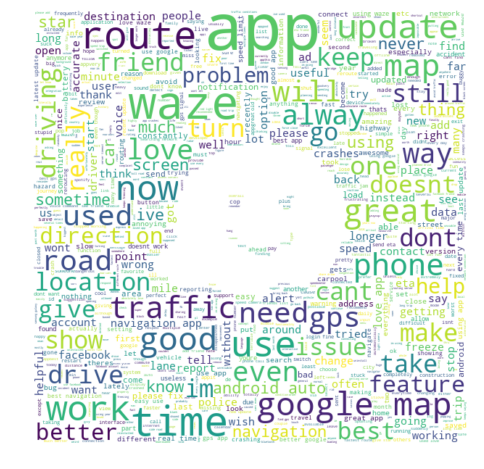

In [144]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [120]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "fiver.jpg")))

In [121]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze[waze.Stars=='Rated 5 stars out of five stars']['Reviews']))

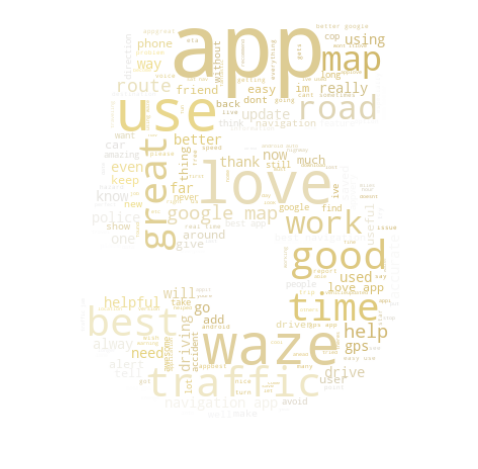

In [122]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [123]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "four4.jfif")))

In [124]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze[waze.Stars=='Rated 4 stars out of five stars']['Reviews']))

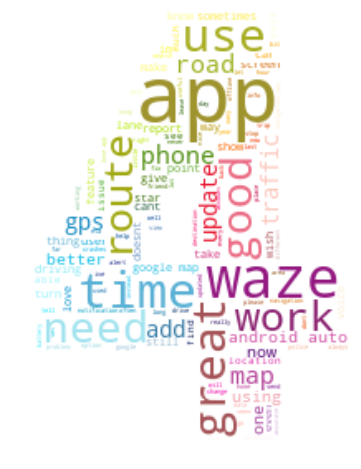

In [125]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [130]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "Three.png")))

In [131]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze[waze.Stars=='Rated 3 stars out of five stars']['Reviews']))

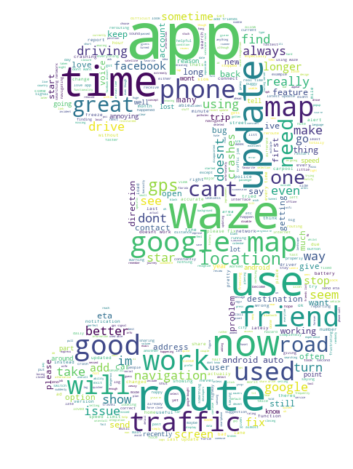

In [132]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [133]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "2.jpg")))

In [134]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze[waze.Stars=='Rated 2 stars out of five stars']['Reviews']))

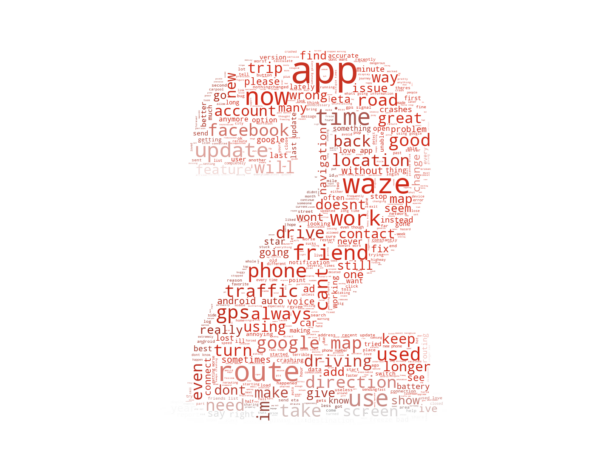

In [135]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')

In [136]:
d = getcwd()
mask = np.array(Image.open(path.join(d, "oneone.png")))

In [137]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=1000, mask=mask, max_font_size=90, random_state=42)
# generate word cloud
#wc.generate(''.join(waze['Reviews']))
image_colors = ImageColorGenerator(mask)
wc.generate(''.join(waze[waze.Stars=='Rated 1 stars out of five stars']['Reviews']))

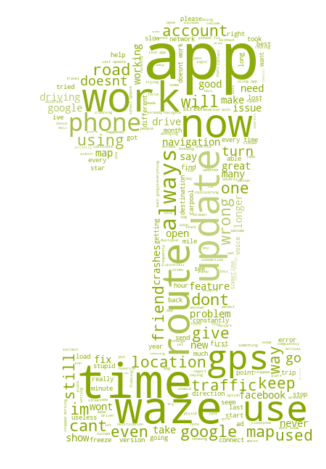

In [138]:
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.axis("off")
plt.show()
#plt.savefig('image.png')